# Unsupervised Learning Project<br> Credit Card Customer Segmentation
### Thomas Webb <br> January 12th, 2021

##### `Background:` 
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

 

##### `Objective:`
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.



In [528]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from scipy.stats import zscore
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [529]:
data = pd.read_excel('Credit Card Customer Data.xlsx')

In [530]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


# Exploratory Data Analysis

In [531]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


##### `Insights:`
"SI_No" and "Customer Key" appear to be customer identifiers and not particularly relevant to customer segmentation.

In [532]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


##### `Insights:`
Every column is formatted as a 64 bit integer.

In [533]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

##### `Insights:`
There are no missing values in the data.

In [534]:
skewdf = pd.DataFrame(data.skew(axis = 0, skipna = True), columns = ['Skew'])
skewdf.sort_values(by=['Skew'])

,Skew
Sl_No,0.000000
Customer Key,0.051462
Total_visits_bank,0.141896
Total_Credit_Cards,0.144879
Total_calls_made,0.658905
Avg_Credit_Limit,2.202396
Total_visits_online,2.225607


##### `Insights:`
Average Credit Limit and Total Visits online are the most sweked or unevenly distributed variables, with the majority of customers having a lower credit limit and banking online fewer times.

## Univariate Analysis

### Total Visits to Bank

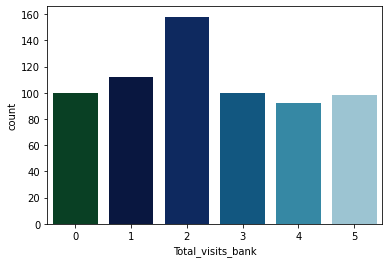

In [535]:
sns.countplot(data['Total_visits_bank'],palette='ocean')

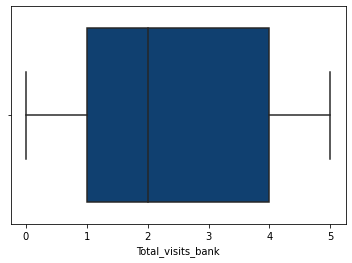

In [536]:
sns.boxplot(data['Total_visits_bank'],palette='ocean')

### Total Credit Cards

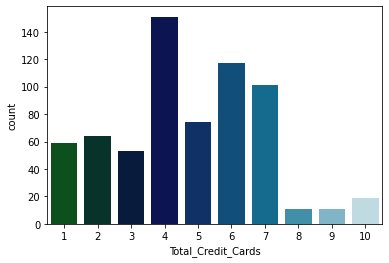

In [537]:
# Total credit cards
sns.countplot(data['Total_Credit_Cards'],palette='ocean')

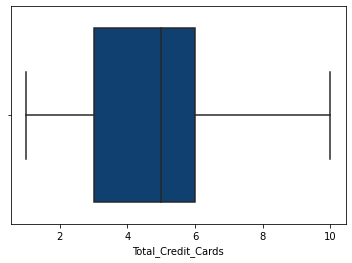

In [538]:
sns.boxplot(data['Total_Credit_Cards'],palette='ocean')

### Total Calls Made

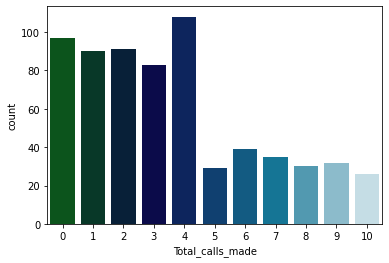

In [539]:
sns.countplot(data['Total_calls_made'],palette='ocean')

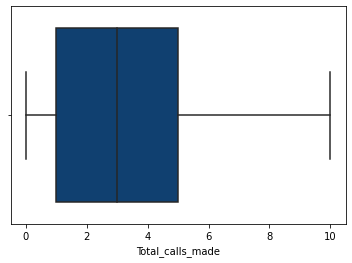

In [540]:
sns.boxplot(data['Total_calls_made'],palette='ocean')

### Average Credit Limit

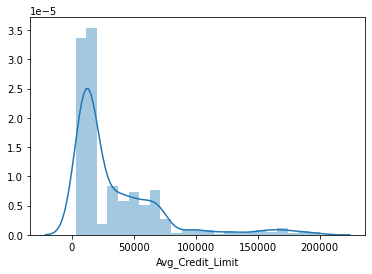

In [541]:
sns.distplot(data['Avg_Credit_Limit'])

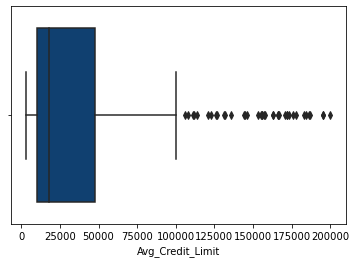

In [542]:
sns.boxplot(data['Avg_Credit_Limit'],palette='ocean')

### Total Online Visits

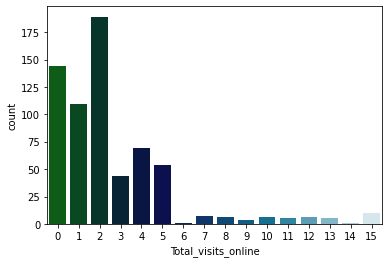

In [543]:
sns.countplot(data['Total_visits_online'],palette='ocean')

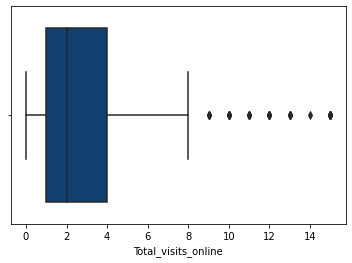

In [544]:
sns.boxplot(data['Total_visits_online'],palette='ocean')

## Bivariate Analysis

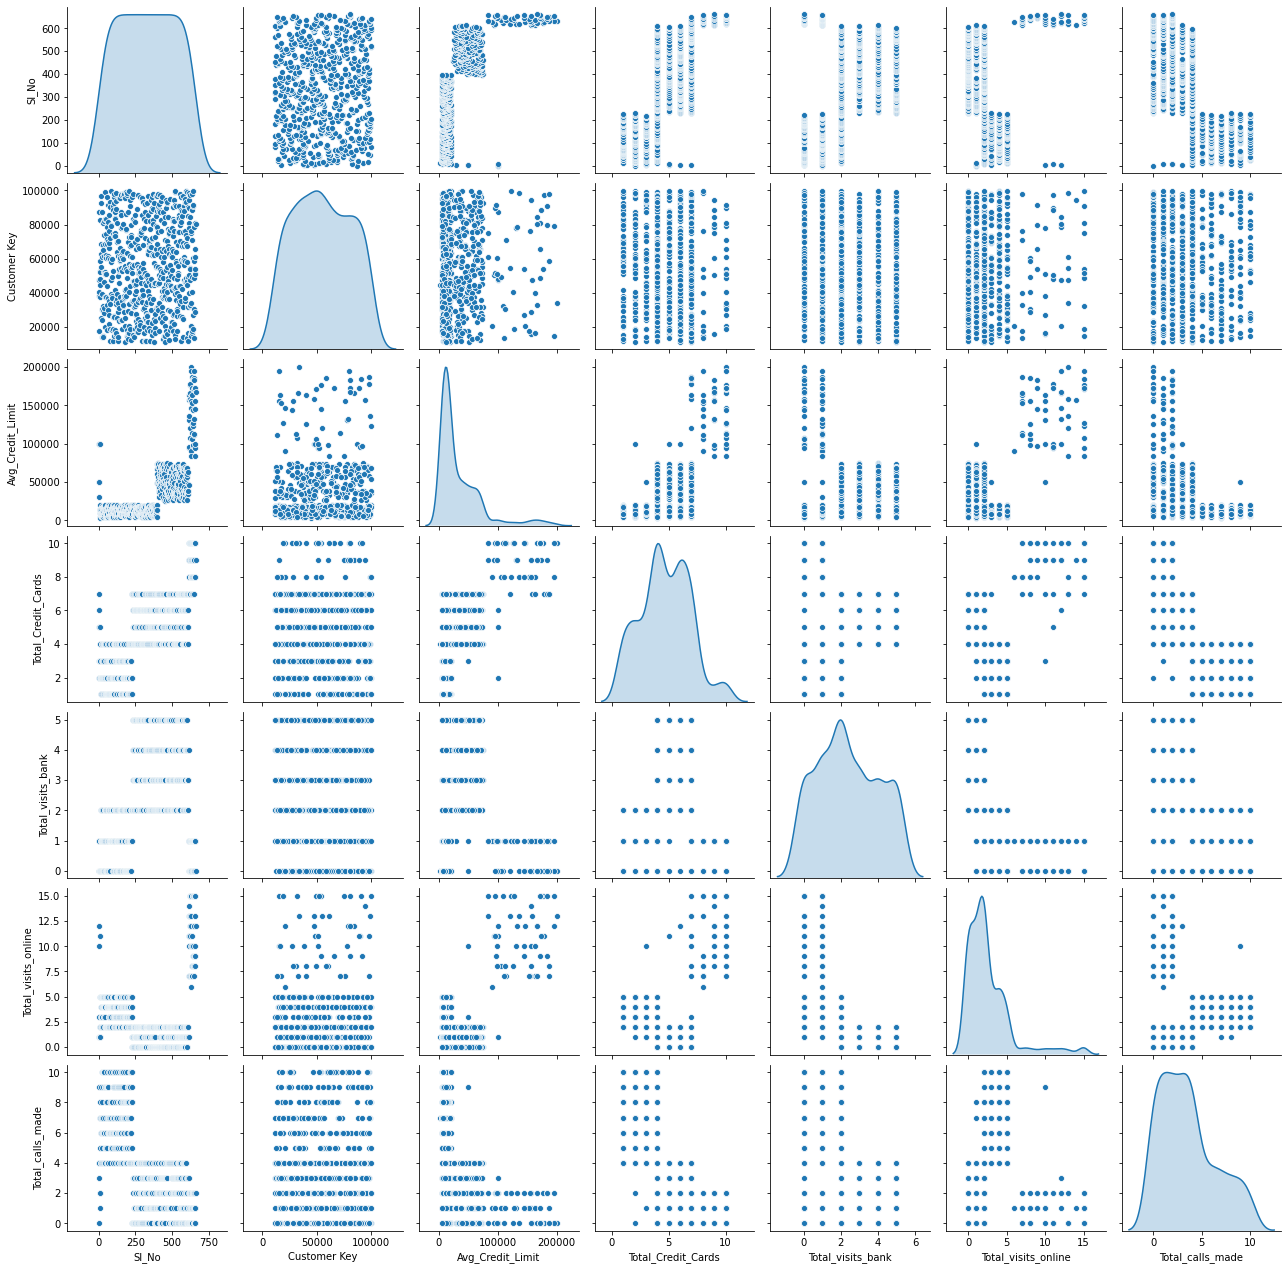

In [545]:
sns.pairplot(data=data, diag_kind='kde')

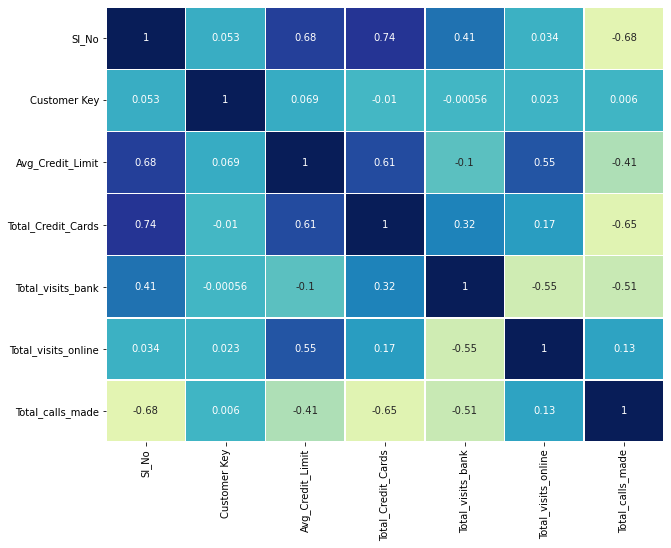

In [546]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

## Insights

`Average Credit Limit:` 
- Customers with a credit limit of **25,000 or less** typically have **1-4** credit cards.
- Customers with a credit limit of **25,000 or less** are the only people who make **more than 4** calls.

- Customers with a credit limit of **25,000** to **75,000** typically have **4-7** credit cards.
- Customers with a credit limit of **25,000** to **75,000** typically make **4 or less** calls.

- Customers with a credit limit **over 75,000** typically have **7 or more** credit cards.
- Customers with a credit limit **over 75,000** never visit the bank more than **once**.
- Customres with a credit limit **over 75,000** typically bank online more than **7** times.
- Customers with a credit limit **over 75,000** typically make **2 or less** calls.

`Total Credit Cards`
- Customers with **less than 4** credit cards typically visit the bank **5 or less** times.
- Customers with **less than 4** credit cards typically bank online **2 or less** times.
- Customers with **less than 4** credit cards are the only people who make **more than 4** calls.

- Customers with **4-7** credit cards are the only people who visit the bank **more than 2** times.
- Customers with **4-7** credit cards typically bank online **less than 2** times.
- Customers with **4-7** credit cards typically make **4 or less** calls.

- Customers with **more than 7** credit cards typically visit the bank **1 time or less**.
- Customers with **more than 7** credit cards typically bank online **more than 7 times**.
- Customers with **more than 7** credit cards typically make **2 or less** calls.

`Total Visits to the Bank`
- Customers who visit the bank **once or never** are the only people who bank online **more than 5** times.
- Customers who visit the bank **2 times or less** will bank online **0-5 times**.
- Customers who visit the bank **2 times or less** are the only people who will call **more than 5 times**.
- Customers who visit the bank **3 or more times** will typically never bank online **more than 2 times**.
- Customers who visit the bank **3 or more times** will typically call **4 times or less**.


`Total Visits Online`
- Customers who bank online **less than 2 times** will typically only call **4 or less times**.
- Customers who bank online **2-5 times** will typically call **4-10 times**.
- Customers who bank online **6 or more times** will typically call **2 or less times**.

## Indicators of Customer Segmentation 


Upon analyzing the bivariate data relationships, we can see that the are typically 3 clear groups of customer behavior. The following are some of the relatively obvious customer groups that can be seen from a simple EDA:

`Average Credit Limit`
- Customers with a credit limit of **less than 25,000**
- Customers with a credit limit of **25,000** to **75,000**
- Customers with a credit limit **more than 75,000**

`Total Credit Cards`
- Customers with **less than 4** credit cards
- Customers with **4-7** credit cards
- Customers with **more than 7** credit cards

`Total Visits to the Bank`
- Customers who visit the bank **once or never**
- Customers who visit the bank **2 times or less**
- Customers who visit the bank **3 or more times**

`Total Visits Online`
- Customers who bank online **less than 2 times**
- Customers who bank online **2-5 times**
- Customers who bank online **6 or more times**

`Total Calls Made`
- Customers who make **2 or less** calls
- Customers who make **up to 4** calls
- Customers who make **up to 10** calls

By referencing these observations with the pairplot of bivariate relationships, it is apparent that in most cases three distinct groups of customer segmentation appear in the data.

# K-Means Clustering

In [547]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [548]:
# create a scaled dataframe that only has columns that contain relevant customer segmentation data
dataAttributes = data.iloc[:,2:]
dataScaled = dataAttributes.apply(zscore)

In [549]:
dataScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


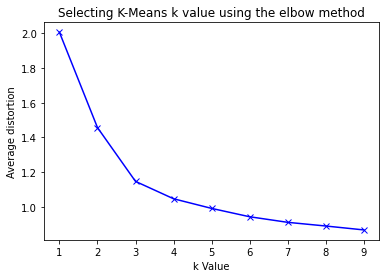

In [550]:
# create an elbow plot in order to determine the best value of k to use in k-means clustering

clusters = range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dataScaled)
    prediction = model.predict(dataScaled)
    meanDistortions.append(sum(np.min(cdist(dataScaled, model.cluster_centers_, 'euclidean'), axis=1))/ dataScaled.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k Value')
plt.ylabel('Average distortion')
plt.title('Selecting K-Means k value using the elbow method')
plt.show()


##### `Insights:`
As we can see a significant flattening of the slope after **k=3**, we can assume that **3** will be the most valuable value to use for k in our k-means clustering.

In [551]:
# execute k-means clustering on a k of 3, as determined best by the elbow method
kmeans_model = KMeans(3)
kmeans_model.fit(dataScaled)
prediction = kmeans_model.predict(dataScaled)

# add a column that shows which group each entry belongs to
grouped_data_kmeans = dataScaled.copy()
grouped_data_kmeans['group'] = prediction
print("Groups Assigned : \n")
grouped_data_kmeans.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


In [552]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(dataScaled, prediction)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.5157182558881063


In [553]:
# Create DataFrame to store performance metrics
resultsDf = pd.DataFrame({'Method(Linkage)':['K-Means'], 'Cophenetic Coefficient': "N/A", 'Silhouette Score': sil_score})
resultsDf = resultsDf[['Method(Linkage)', 'Cophenetic Coefficient', 'Silhouette Score']]

In [554]:
# review the contents of the groups created by k-means clustering
dataClust = grouped_data_kmeans.groupby(['group'])
dataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
group,,,,,
0,-0.595796,-1.059623,-0.901518,0.322997,1.148109
1,-0.021062,0.373690,0.666395,-0.553672,-0.553005
2,2.831764,1.862226,-1.105763,2.827319,-0.874330


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d2f7e50>,
      dtype=object)

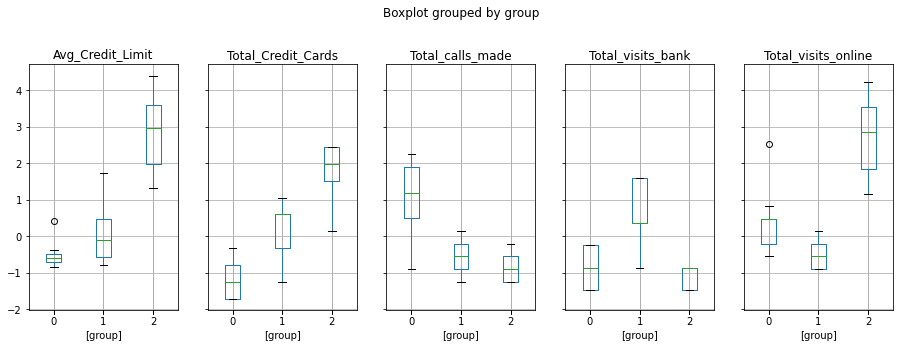

In [555]:
# use boxplots to analyze contents of k-means clustered groups
grouped_data_kmeans.boxplot(by='group', layout = (2,5), figsize = (15, 10))

##### `Insights:`
From the boxplots, we can tell that our clustering algorithm was successful. Notice how the 3 groups within each variable are occupying relatively different space along the y-axis. We can tell from the boxplots that each group is relatively similar to other members of its group, and relatively distant from members of other groups. The boxplots for "Total_Credit_Cards" and "Total_visits_online" are great examples of a successful clustering algorithm boxplot.

# Hierarchical Clustering

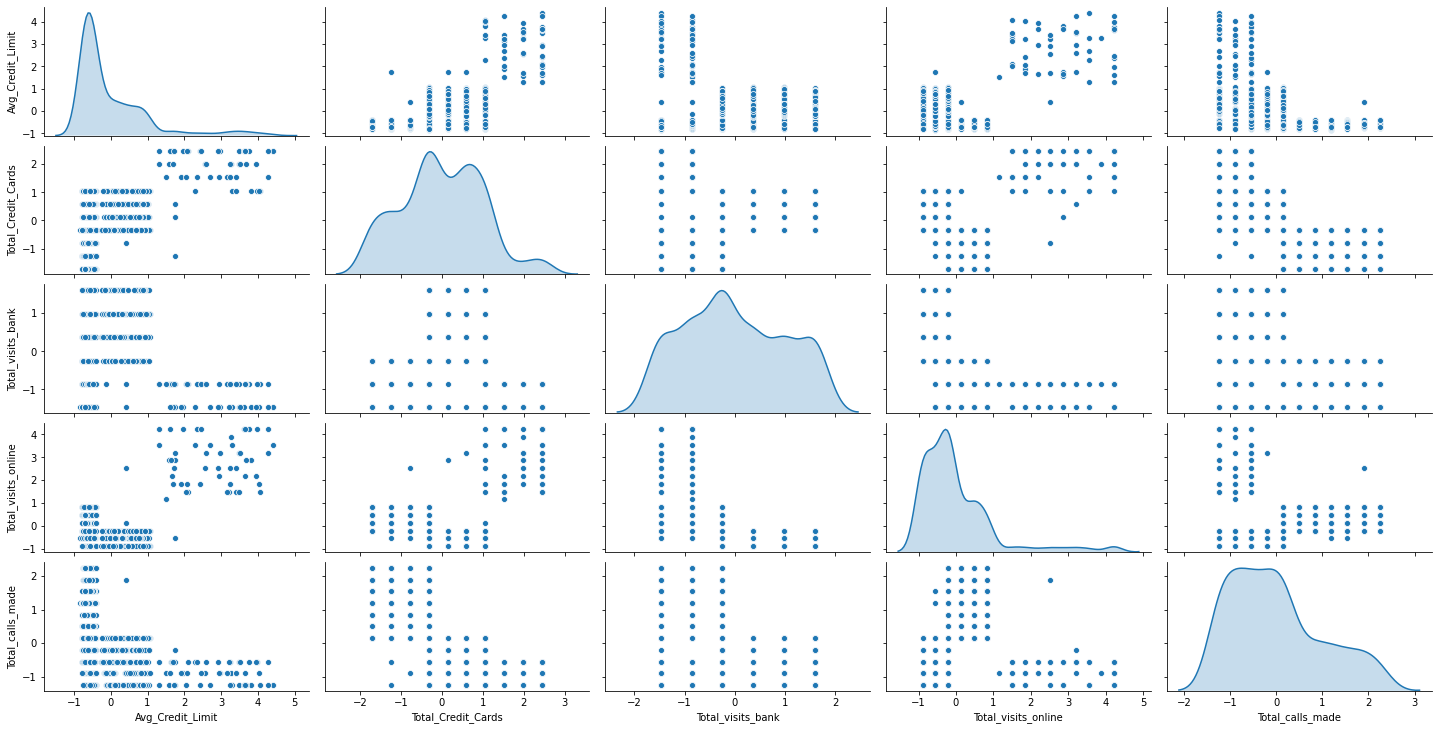

In [556]:
sns.pairplot(dataScaled, height = 2, aspect = 2, diag_kind = 'kde')

In [557]:
hierarch_model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')

In [558]:
hierarch_model.fit(dataScaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [559]:
dataAttributes['labels']= hierarch_model.labels_
dataAttributes.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
5,20000,3,0,1,8,2
6,100000,5,0,11,2,1
7,15000,3,0,1,1,2
8,5000,2,0,2,2,2
9,3000,4,0,1,7,2


In [560]:
dataAttributes.groupby(['labels']).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,387,387,387,387,387
1,50,50,50,50,50
2,223,223,223,223,223


In [561]:
dataClust = dataAttributes.groupby(['labels'])

In [562]:
dataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408


# Average Linkage

In [563]:
# find the cophenetic correlation coefficient using the 'average' linkage method
z = linkage(dataScaled, metric = 'euclidean', method = 'average')
c, coph_dists = cophenet(z, pdist(dataScaled))

print("Cophenetic Coefficient: ",c)

Cophenetic Coefficient:  0.8977080867389372


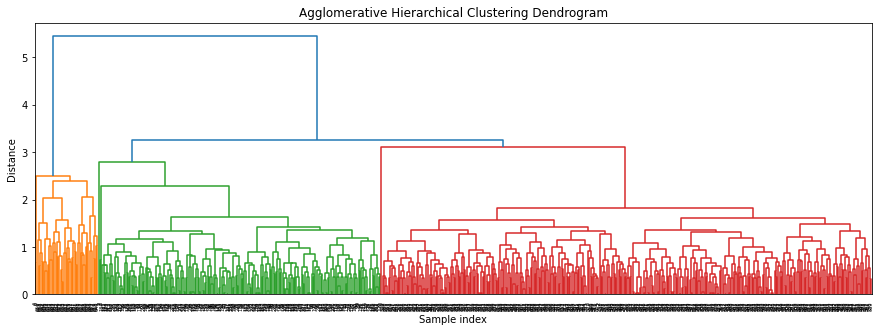

In [564]:
# create a dendrogram 
plt.figure(figsize = (15,5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(z,color_threshold = 3.2)
plt.show()

##### `Insights:`
From the dendrogram, three distinct groups of customer data appear and can be easily separated and identified.

<function matplotlib.pyplot.show(*args, **kw)>

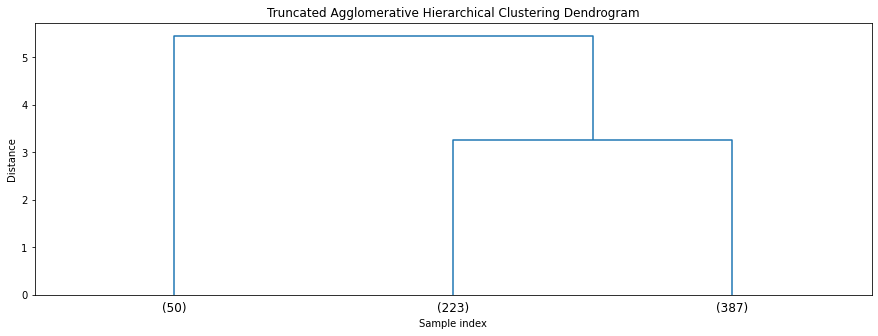

In [565]:
# truncate dendrogram to show only the last 3 merged clusters

plt.figure(figsize = (15,5))
plt.title('Truncated Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(z,
           color_threshold = 3.2,
           truncate_mode='lastp',
           p=3)

plt.show

In [566]:
max_d = 3.2

In [567]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(z, max_d, criterion = 'distance')

In [568]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(dataScaled, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.515922432650965


In [569]:
# Add new results to the dataframe that records performance metrics
tempResultsDf = pd.DataFrame({'Method(Linkage)':['Average'], 'Cophenetic Coefficient': c, 'Silhouette Score': sil_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method(Linkage)', 'Cophenetic Coefficient', 'Silhouette Score']]

In [570]:
resultsDf

,Method(Linkage),Cophenetic Coefficient,Silhouette Score
0,K-Means,N/A,0.515718
0,Average,0.897708,0.515922


In [571]:
grouped_data_average = dataScaled.copy()
grouped_data_average['cluster'] = clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13fbd75b0>,
      dtype=object)

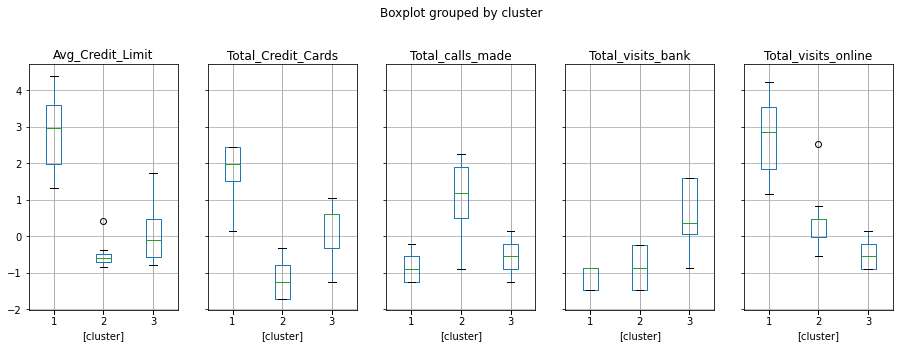

In [572]:
# use boxplots to analyze contents of k-means clustered groups
grouped_data_average.boxplot(by='cluster', layout = (2,5), figsize = (15, 10))

##### `Insights:`
These boxplots are spread out relatively well along the y-axis, and have relatively low overlap. These clusters appear to have been successfully grouped to show valuable customer segmentation.

# Complete Linkage

In [573]:
# find the cophenetic correlation coefficient using the 'complete' linkage method
z = linkage(dataScaled, metric = 'euclidean', method = 'complete')
c, coph_dists = cophenet(z, pdist(dataScaled))

print("Cophenetic Coefficient: ",c)

Cophenetic Coefficient:  0.8599730607972423


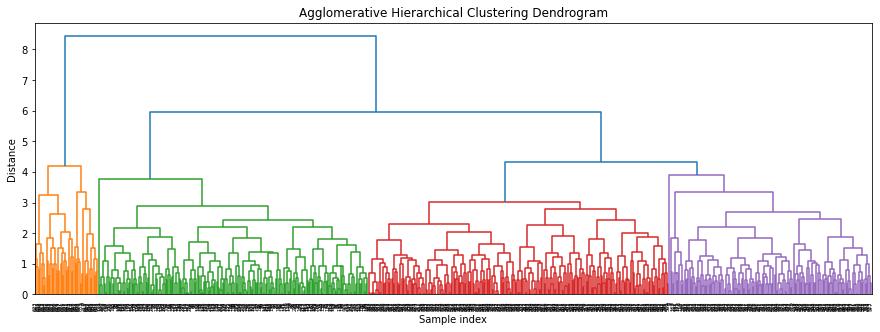

In [574]:
plt.figure(figsize = (15,5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(z,color_threshold = 4.2)
plt.show()

##### `Insights:`
From this dendrogram, we will try to use four clusters to apply customer segmentation, as we can clearly see four groups of customer data that is similar to each other and different from the rest.

<function matplotlib.pyplot.show(*args, **kw)>

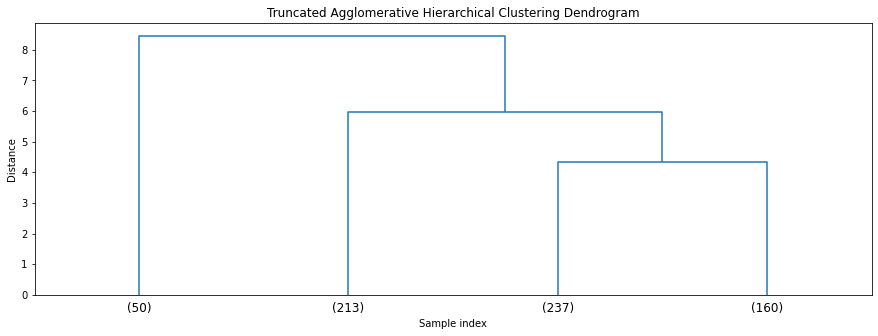

In [575]:
# truncate dendrogram to show only the last 4 merged clusters

plt.figure(figsize = (15,5))
plt.title('Truncated Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(z,
           color_threshold = 4.2,
           truncate_mode='lastp',
           p=4)
plt.show

In [576]:
max_d = 4.2

In [577]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(z, max_d, criterion = 'distance')

In [578]:
sil_score = silhouette_score(dataScaled, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.3052705270877273


In [579]:
# Add new results to the dataframe that records performance metrics
tempResultsDf = pd.DataFrame({'Method(Linkage)':['Complete'], 'Cophenetic Coefficient': c, 'Silhouette Score': sil_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method(Linkage)', 'Cophenetic Coefficient', 'Silhouette Score']]

In [580]:
resultsDf

,Method(Linkage),Cophenetic Coefficient,Silhouette Score
0,K-Means,N/A,0.515718
0,Average,0.897708,0.515922
0,Complete,0.859973,0.305271


In [581]:
grouped_data_complete = dataScaled.copy()
grouped_data_complete['cluster'] = clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13a3ef130>,
      dtype=object)

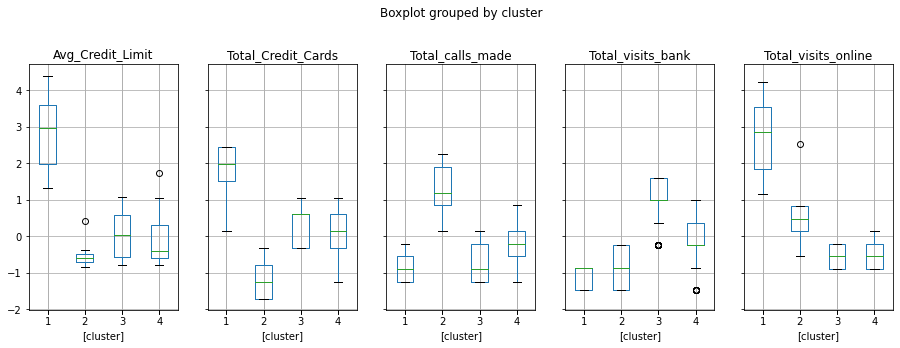

In [582]:
# use boxplots to analyze contents of k-means clustered groups
grouped_data_complete.boxplot(by='cluster', layout = (2,5), figsize = (15, 10))

##### `Insights:`
In most of the boxplots, two of the groups ended up being more similar than the rest of the groups. The fourth cluster may have been less necessary than original anticipated.

# Ward Linkage

In [583]:
# find the cophenetic correlation coefficient using the 'ward' linkage method
z = linkage(dataScaled, metric = 'euclidean', method = 'ward')
c, coph_dists = cophenet(z, pdist(dataScaled))

print("Cophenetic Coefficient: ",c)

Cophenetic Coefficient:  0.7415156284827493


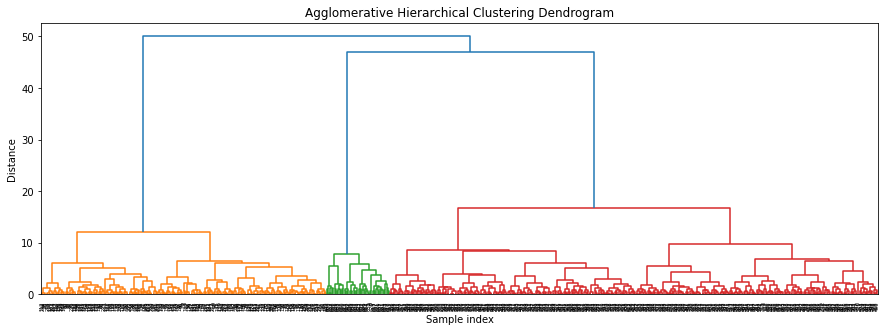

In [584]:
plt.figure(figsize = (15,5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(z, color_threshold = 47)
plt.show()

##### `Insights:`
From the dendrogram, three distinct groups of customer data appear and can be easily separated and identified.

<function matplotlib.pyplot.show(*args, **kw)>

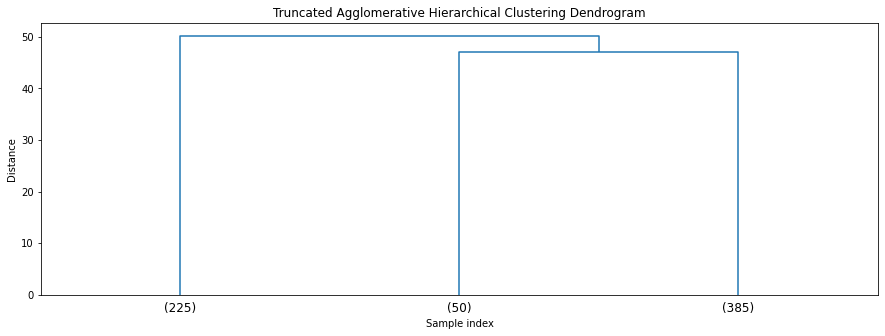

In [585]:
# truncate dendrogram to show only the last 3 merged clusters

plt.figure(figsize = (15,5))
plt.title('Truncated Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(z,
           color_threshold = 47,
           truncate_mode='lastp',
           p=3)
plt.show

In [586]:
max_d = 47

In [587]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(z, max_d, criterion = 'distance')

In [588]:
sil_score = silhouette_score(dataScaled, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.5147639589977819


In [589]:
# Add new results to the dataframe that records performance metrics
tempResultsDf = pd.DataFrame({'Method(Linkage)':['Ward'], 'Cophenetic Coefficient': c, 'Silhouette Score': sil_score})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method(Linkage)', 'Cophenetic Coefficient', 'Silhouette Score']]

In [590]:
resultsDf

,Method(Linkage),Cophenetic Coefficient,Silhouette Score
0,K-Means,N/A,0.515718
0,Average,0.897708,0.515922
0,Complete,0.859973,0.305271
0,Ward,0.741516,0.514764


In [591]:
grouped_data_ward = dataScaled.copy()
grouped_data_ward['cluster'] = clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13f629460>,
      dtype=object)

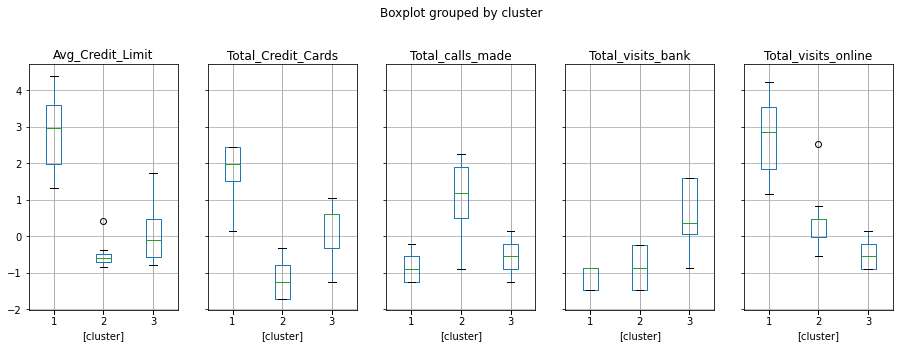

In [592]:
# use boxplots to analyze contents of k-means clustered groups
grouped_data_average.boxplot(by='cluster', layout = (2,5), figsize = (15, 10))

##### `Insights:`
These boxplots are spread out relatively well along the y-axis, and have relatively low overlap. These clusters appear to have been successfully grouped to show valuable customer segmentation.

# Conclusions

In [593]:
resultsDf

,Method(Linkage),Cophenetic Coefficient,Silhouette Score
0,K-Means,N/A,0.515718
0,Average,0.897708,0.515922
0,Complete,0.859973,0.305271
0,Ward,0.741516,0.514764


### Key Questions:

###### Question 1: How many different segments of customers are there?

**Three**. From the EDA, we could see evidence in the bivariate analysis that the customer data was typically organized in three clusters. We can also see that the elbow plot used in k-means clustering supports the existence of 3 groups of customer data as the slope of the plot flattens significantly at k = 3. Lastly, by analyzing the boxplots used in Hierarchical clustering, we can see that each of the three groups for each variable contain mostly data that is similarto each other and different from the rest. The boxes are relatively small with relatively little overlap. This is evidence that the customer data can successful be divided into 3 separate and similar groups

###### Question 2: How are these segments different from each other?

- **Group 1** customers have multiple credit cards and do most of their banking online. They can be considered low maintenance customers because they dont call or visit the bank very often. They also have the highset credit limit by far and the highest potential for spending money.<br><br>
- **Group 2** customers have the fewest amount of credit cards and the lowest credit limits. Because of this they have the lowest potential to spend money, however, they call the bank considerably more often than the rest of the customers.<br><br>
- **Group 3** customers have an average amount of credit cards and a moderate credit limit. They dont call often but they visit the bank significantly more than any other group. Because of this, they are much less likely to engage in online banking.

###### Question 3: What are your recommendations to the bank on how to better market to and service these customers?

The following are some recommendations to the bank based on Exploratory Data Analysis and the results of Clustering Models:
- **The bank should target customers who call frequently and encourage them to try online banking.** The data suggests that customers who bank online frequently will call less often, and answering less calls means bank employees can be more productive. An increase in online engagement for customers is likely to result in fewer calls made to the bank.<br><br>
- **The bank should target customers with fewer credit cards and encourage them to sign up for more.** Customers with 7+ credit cards typically have credit limits nearly double that of customers with 4 or less credit cards. They also call less frequently and bank more often. These customers are more proficient at transactions and have the agency to spend more money because they have higher limits.  The incentive for customers is a larger credit limit, and the incentive for the bank is more proficient customers who spend more money.